In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

<Axes: >

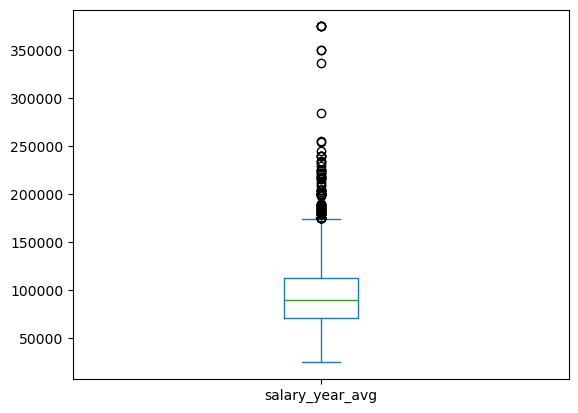

In [3]:
df_DA_US['salary_year_avg'].plot(kind='box')

{'whiskers': [<matplotlib.lines.Line2D at 0x310a425d0>,
 'caps': [<matplotlib.lines.Line2D at 0x310a438d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x3102dc410>],
 'medians': [<matplotlib.lines.Line2D at 0x310a4cb90>],
 'fliers': [<matplotlib.lines.Line2D at 0x310a4d4d0>],
 'means': []}

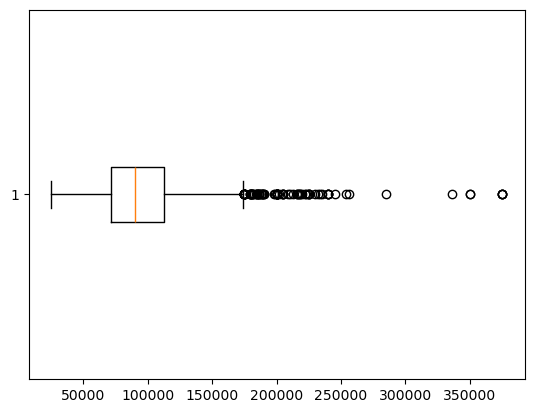

In [7]:
plt.boxplot(df_DA_US['salary_year_avg'], vert = False)


In [8]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

In [9]:
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

/var/folders/rx/g_7y2v794k5cn91ncfww9jf00000gn/T/ipykernel_55713/2867900789.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = job_titles, vert = False)


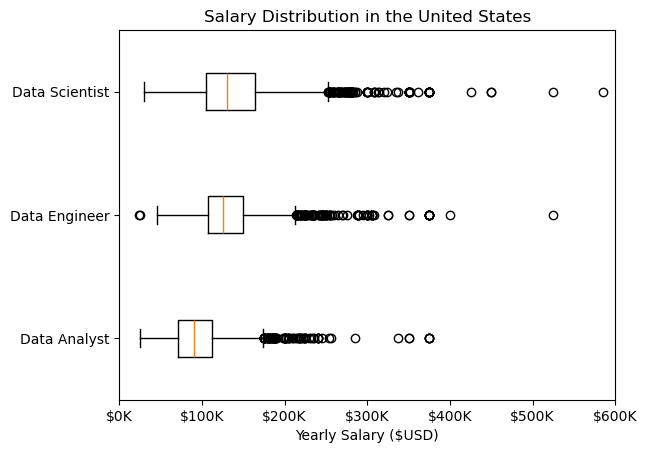

In [16]:
plt.boxplot(job_list, labels = job_titles, vert = False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

In [17]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

In [20]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_US_top_pay = df_DA_US_group.sort_values(by = 'median', ascending = False).head(10)
df_DA_US_skills = df_DA_US_group.sort_values(by = 'count', ascending = False).head(10).sort_values(by = 'median', ascending = False)

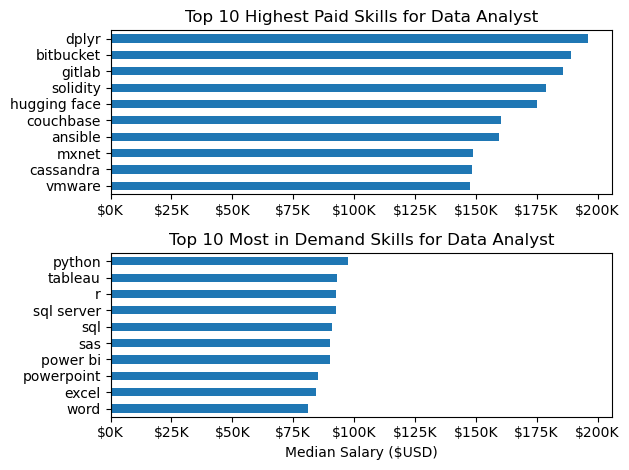

In [29]:
fig, ax = plt.subplots(2,1)

df_DA_US_top_pay[: :-1].plot(kind = 'barh', y = 'median', ax = ax[0], legend = False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

df_DA_US_skills[: :-1].plot(kind = 'barh', y = 'median', ax = ax[1], legend = False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most in Demand Skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
fig.tight_layout()

In [30]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()

df_DS_US = df_DS_US.dropna(subset = ['salary_hour_avg'])

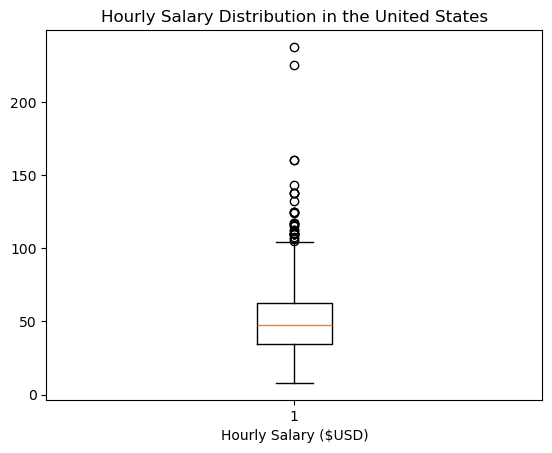

In [32]:
plt.boxplot(df_DS_US['salary_hour_avg'])
plt.title('Hourly Salary Distribution in the United States')
plt.xlabel('Data Scientist')
plt.xlabel('Hourly Salary ($USD)')
plt.show()

In [36]:
countries = ['United States', 'Canada']
df_USC = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'].isin(countries))].copy()
df_USC = df_USC.dropna(subset=['salary_hour_avg'])

countries_list = [df_USC[df_USC['job_country'] == country]['salary_hour_avg'] for country in countries]

/var/folders/rx/g_7y2v794k5cn91ncfww9jf00000gn/T/ipykernel_55713/464475027.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(countries_list, labels=countries)


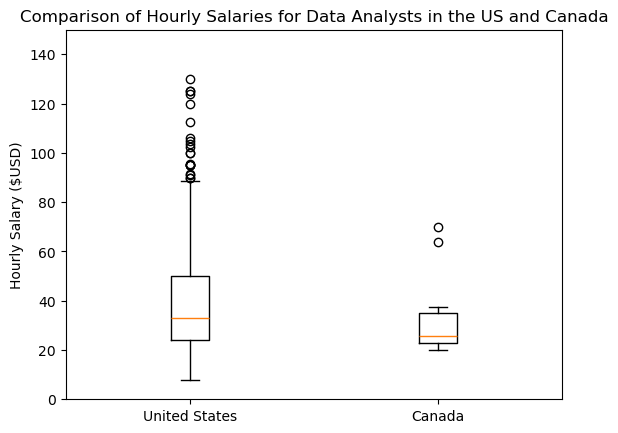

In [38]:
plt.boxplot(countries_list, labels=countries)
plt.xlabel('')
plt.ylabel('Hourly Salary ($USD)')
plt.ylim(0, 150)
plt.title('Comparison of Hourly Salaries for Data Analysts in the US and Canada')
plt.show()

In [41]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_C = df[(df['job_country'] == 'Canada') & (df['job_title_short'].isin(job_titles))].copy()

df_C = df_C.dropna(subset = ['salary_hour_avg'])

In [42]:
jobs_list = [df_C[df_C['job_title_short'] == job_title]['salary_hour_avg'] for job_title in job_titles]

/var/folders/rx/g_7y2v794k5cn91ncfww9jf00000gn/T/ipykernel_55713/36409400.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(jobs_list, labels=job_titles)


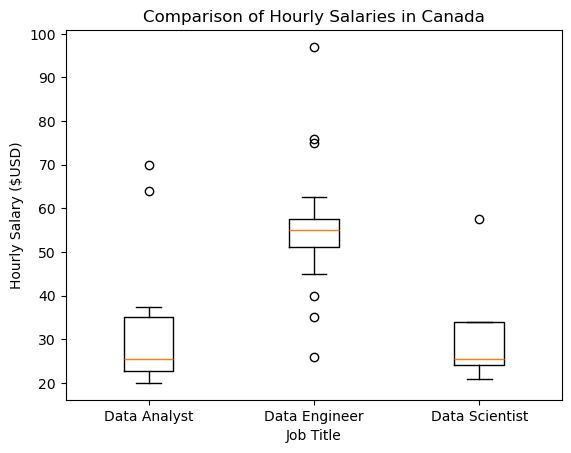

In [47]:
fig, ax = plt.subplots()
ax.boxplot(jobs_list, labels=job_titles)
plt.xlabel('Job Title')
plt.ylabel('Hourly Salary ($USD)')
plt.title('Comparison of Hourly Salaries in Canada')
plt.show()